In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicSpline

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Martín Calvo

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



f'(pi/8) = -0.2217,               h = 1.0                                           -sen(pi/8) = -0.3827
El error del valor obtenido de la derivada de cos(x) con h = 1.0 evaluada en pi/8 respecto al valor exacto -sin(pi/8) es 42.062646%
f'(pi/8) = -0.3864,               h = 0.05                                           -sen(pi/8) = -0.3827
El error del valor obtenido de la derivada de cos(x) con h = 0.05 evaluada en pi/8 respecto al valor exacto -sin(pi/8) es 0.981642%
f'(pi/8) = -0.3864,               h = 0.025                                           -sen(pi/8) = -0.3827
El error del valor obtenido de la derivada de cos(x) con h = 0.025 evaluada en pi/8 respecto al valor exacto -sin(pi/8) es 0.981756%
f'(pi/8) = -0.3864,               h = 0.0125                                           -sen(pi/8) = -0.3827
El error del valor obtenido de la derivada de cos(x) con h = 0.0125 evaluada en pi/8 respecto al valor exacto -sin(pi/8) es 0.981763%
f'(pi/8) = -0.3864,               h = 0.000

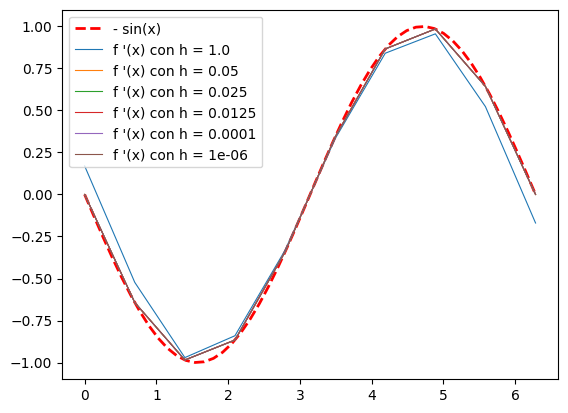

El error del valor obtenido de la derivada de f'(x) con h = 1.0 evaluada en pi/8 respecto al valor exacto -cos(pi/8) es 7.062080%
El error del valor obtenido de la derivada de f'(x) con h = 0.05 evaluada en pi/8 respecto al valor exacto -cos(pi/8) es 0.016177%
El error del valor obtenido de la derivada de f'(x) con h = 0.025 evaluada en pi/8 respecto al valor exacto -cos(pi/8) es 0.016177%
El error del valor obtenido de la derivada de f'(x) con h = 0.0125 evaluada en pi/8 respecto al valor exacto -cos(pi/8) es 0.016177%
El error del valor obtenido de la derivada de f'(x) con h = 0.0001 evaluada en pi/8 respecto al valor exacto -cos(pi/8) es 0.016177%
El error del valor obtenido de la derivada de f'(x) con h = 1e-06 evaluada en pi/8 respecto al valor exacto -cos(pi/8) es 0.016177%


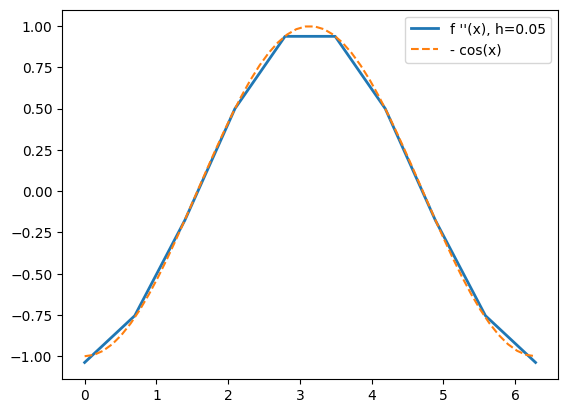

-cos(pi/8) = -0.9239,   f''(pi/8) = -0.9237, con h = 0.05
El error del valor obtenido de la derivada de cos(x) con h = 1e-10 evaluada en pi/8 respecto al valor exacto -sin(pi/8) es 283.416773%
El error del valor obtenido de la derivada de f'(x) con h = 1e-10 evaluada en pi/8 respecto al valor exacto -cos(pi/8) es 44.650067%
Uno pensaría que al disminuir más y más la h se iría disminuyendo el error. Sin embargo para valores demasiado pequeños empieza a hacer operaciones con números tan pequeños que la máquina se encarta y el error se dispara


In [27]:
def d5puntos(f,x,h):
  if abs(h)<1e-12:
    raise ValueError("h demasiado pequeña")

  derivada=np.zeros_like(x,dtype=float)
  for i in range(len(x)):

    if i==0 or i==1 or i==2:
      derivada[i]=(-25*f(x[i])+48*f(x[i]+h)-36*f(x[i]+2*h)+16*f(x[i]+3*h)-3*f(x[i]+4*h))/(12*h) #Derivada adelantada

    elif i==len(x)-2 or i==len(x)-1 or i==len(x):
      derivada[i]=(25*f(x[i])-48*f(x[i]-h)+36*f(x[i]-2*h)-16*f(x[i]-3*h)+3*f(x[i]-4*h))/(12*h) #Derivada centrada

    else:
      derivada[i]=(f(x[i]-2*h)-8*f(x[i]-h)+8*f(x[i]+h)-f(x[i]+2*h))/(12*h) #derivada atrasada

  return derivada

f=lambda x: np.cos(x)
x=np.linspace(0,2*np.pi,10) #definiendo las funciones
df=lambda x: -np.sin(x)
y=df(x)
h=np.array([1,0.05,0.025,0.0125,0.0001,0.000001]) #unas cuantas h para que se puedan variar
xgraf=np.linspace(0,2*np.pi)

plt.plot(xgraf,df(xgraf), label="- sin(x)" ,linestyle="--",linewidth=2, color="red")

for i in h:
  plt.plot(x,d5puntos(f,x,i), label=f"f '(x) con h = {i}", linewidth=0.8)
  derivadafuncion=CubicSpline(x,d5puntos(f,x,i)) #hago que cubicsplines interpole una función con los puntos que obtuvimos con el método de 5 puntos
  print(f"f'(pi/8) = {derivadafuncion(np.pi/8):.4f},               h = {i}                                           -sen(pi/8) = {-np.sin(np.pi/8):.4f}")
  print(f"El error del valor obtenido de la derivada de cos(x) con h = {i} evaluada en pi/8 respecto al valor exacto -sin(pi/8) es {100*abs((derivadafuncion(np.pi/8)+np.sin(np.pi/8))/np.sin(np.pi/8)):.6f}%")
plt.legend()
plt.show()

segundaderivada=(d5puntos(derivadafuncion,x,0.05)) #lo mismo que antes, solo que ahora la función es la derivada anterior
plt.plot(x, segundaderivada,linewidth=2,label="f ''(x), h=0.05")
plt.plot(xgraf,-np.cos(xgraf), linestyle="--",label="- cos(x)")
plt.legend()


for i in h:
  derivada2funcion=CubicSpline(x,d5puntos(derivadafuncion,x,i))
  print(f"El error del valor obtenido de la derivada de f'(x) con h = {i} evaluada en pi/8 respecto al valor exacto -cos(pi/8) es {100*abs((derivada2funcion(np.pi/8)+np.cos(np.pi/8))/np.cos(np.pi/8)):.6f}%")
plt.show()


derivada2funcion=CubicSpline(x,d5puntos(derivadafuncion,x,h[1]))
print(f"-cos(pi/8) = {-np.cos(np.pi/8):.4f},   f''(pi/8) = {derivada2funcion(np.pi/8):.4f}, con h = {h[1]}")

hextrema1=derivadafuncion=CubicSpline(x,d5puntos(f,x,1-10))  #un par de funciones con un h muy pequeña para mostrar que no siempre más pequeño es mejor
hextrema2=CubicSpline(x,d5puntos(derivadafuncion,x,1e-10))
print(f"El error del valor obtenido de la derivada de cos(x) con h = {1e-10} evaluada en pi/8 respecto al valor exacto -sin(pi/8) es {100*abs((hextrema1(np.pi/8)+np.sin(np.pi/8))/np.sin(np.pi/8)):.6f}%")
print(f"El error del valor obtenido de la derivada de f'(x) con h = {1e-10} evaluada en pi/8 respecto al valor exacto -cos(pi/8) es {100*abs((hextrema2(np.pi/8)+np.cos(np.pi/8))/np.cos(np.pi/8)):.6f}%")
print("Uno pensaría que al disminuir más y más la h se iría disminuyendo el error. Sin embargo para valores demasiado pequeños empieza a hacer operaciones con números tan pequeños que la máquina se encarta y el error se dispara")

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

Con gradient, df/dx = 22.19913
Con gradient, d^2f/dx^2 = 30.78462
Usando sypmy, df/dx = 22.16717 
Usando sypmy, d^2f/dx^2 = 29.55622 
------
f'(2) = 22.16717   Para h=0.01
f''(2) = 29.55613  Para h=0.01
El error de la primera derivada respecto a np.gradient es 0.14398%
El error de la segunda derivada respecto a np.gradient es 3.99061%
El error de la primera derivada respecto a sp.diff es 0.00002%
El error de la segunda derivada respecto a sp.diff es 0.00033%
------
f'(2) = 22.16581   Para h=0.12
f''(2) = 29.61893  Para h=0.12
El error de la primera derivada respecto a np.gradient es 0.15010%
El error de la segunda derivada respecto a np.gradient es 3.78660%
El error de la primera derivada respecto a sp.diff es 0.00612%
El error de la segunda derivada respecto a sp.diff es 0.21216%
------
f'(2) = 22.14413   Para h=0.23
f''(2) = 29.81524  Para h=0.23
El error de la primera derivada respecto a np.gradient es 0.24779%
El error de la segunda derivada respecto a np.gradient es 3.14890%
El er

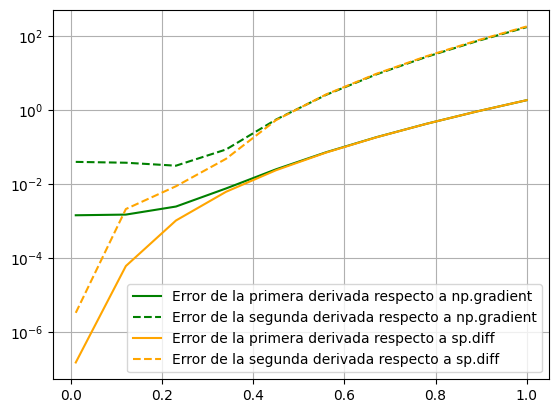

La h óptima en este caso parece estar entre el 0.1 y 0.4, pues se puede observar que el error de la segunda derivada respecto a gradient es creciente tanto hacia la 'derecha' como hacia la 'izquierda' de 0.2, por lo que ese punto es en el que sería menor; el resto de funciones sí parecen tener un error menor entre más cercano a 0 


In [53]:
x=np.linspace(1.8,2.2,6)
h=np.linspace(0.01,1,10)
f=lambda x: x*np.e**(x)

equis=sp.symbols("x")

funciongradient=CubicSpline(x,np.gradient(f(x),x))  #Nuevamente quiero volver las derivadas que obtuve en funciones para poderlas evaluar
funcion2gradient=CubicSpline(x,np.gradient(funciongradient(x),x))
print(f"Con gradient, df/dx = {funciongradient(2):.5f}")
print(f"Con gradient, d^2f/dx^2 = {funcion2gradient(2):.5f}")

equis=sp.symbols("x")
efe=f(equis)
defe=sp.diff(efe,equis)
d2efe=sp.diff(defe,equis)
print(f"Usando sypmy, df/dx = {defe.subs(equis,2):.5f} ")
print(f"Usando sypmy, d^2f/dx^2 = {d2efe.subs(equis,2):.5f} ")

error1grad=[]
error2grad=[]
error1sp=[]
error2sp=[]

for i in h: #en este ciclo se calcula la función de las derivadas para cada h, el valor de la derivada evaluada en 2y el error con respecto a gradient y a sp.diff. se añaden los errores a listas para graficar después
  df=CubicSpline(x,d5puntos(f,x,i))
  d2f=CubicSpline(x,d5puntos(df,x,i))

  print("------")
  print(f"f'(2) = {df(2):.5f}   Para h={i}")
  print(f"f''(2) = {d2f(2):.5f}  Para h={i}")
  print(f"El error de la primera derivada respecto a np.gradient es {100*abs((df(2)-funciongradient(2))/funciongradient(2)):.5f}%")
  print(f"El error de la segunda derivada respecto a np.gradient es {100*abs((d2f(2)-funcion2gradient(2))/funcion2gradient(2)):.5f}%")
  print(f"El error de la primera derivada respecto a sp.diff es {100*abs((df(2)-defe.subs(equis,2))/defe.subs(equis,2)):.5f}%")
  print(f"El error de la segunda derivada respecto a sp.diff es {100*abs((d2f(2)-d2efe.subs(equis,2))/d2efe.subs(equis,2)):.5f}%")
  error1grad.append(abs((df(2)-funciongradient(2))/funciongradient(2)))
  error2grad.append(abs((d2f(2)-funcion2gradient(2))/funcion2gradient(2)))
  error1sp.append(abs((df(2)-defe.subs(equis,2))/defe.subs(equis,2)))
  error2sp.append(abs((d2f(2)-d2efe.subs(equis,2))/d2efe.subs(equis,2)))

plt.semilogy(h,error1grad,color="g", label="Error de la primera derivada respecto a np.gradient") #la forma de las funciones se veía igual en semilogy que en loglog así que preferí dejarlo así para ver las h más claramente
plt.semilogy(h,error2grad,color="g", linestyle="--", label="Error de la segunda derivada respecto a np.gradient")
plt.semilogy(h,error1sp, color="orange", label="Error de la primera derivada respecto a sp.diff")
plt.semilogy(h,error2sp,color="orange", linestyle="--", label="Error de la segunda derivada respecto a sp.diff")
plt.legend()
plt.grid()
plt.show()
print("La h óptima en este caso parece estar entre el 0.1 y 0.4, pues se puede observar que el error de la segunda derivada respecto a gradient es creciente tanto hacia la 'derecha' como hacia la 'izquierda' de 0.2, por lo que ese punto es en el que sería menor; el resto de funciones sí parecen tener un error menor entre más cercano a 0 ")